# Estimate pi

In [85]:
import numpy as np
import scipy.stats as stats
import random

import math
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter

In [2]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue 0
    (255, 127, 14),  # Orange 1
    (44, 160, 44),   # Green 2
    (214, 39, 40),   # Red 3
    (148, 103, 189), # Purple 4 
    (140, 86, 75),   # Brown 5
    (227, 119, 194), # Pink 6
    (127, 127, 127), # Gray 7
    (188, 189, 34),  # Yellow 8
    (23, 190, 207),  # Cyan 9
]

# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]

font = {'family': 'Georgia', 'color':  'black', 'weight': 'normal', 'size': 20}
title_font = {'family': 'Georgia', 'color':  'black', 'weight': 'bold', 'style': 'italic', 'size': 20}
suptitle_font = FontProperties(family='Georgia', weight='bold', size=22)
legend_font = FontProperties(family='Georgia', weight='normal', size=16)
tick_font = {'family': 'Georgia', 'size': 18}

In [3]:
def is_in_circle(x, y):
    return ((x ** 2.0 + y ** 2.0) < 1.0)

In [50]:
def is_in_on_circle(x, y):
    return ((x ** 2.0 + y ** 2.0) <= 1.0)

## Plot coordinates

In [32]:
def visualize_MC(N=500):
    in_count = 0
    xs = np.zeros(N)
    ys = np.zeros(N)
    colors = []
    for i in range(N):
        x = random.random()
        y = random.random()
        xs[i], ys[i] = x, y
        if is_in_circle(x, y):
            in_count += 1
            colors.append(tableau_colors[0])
        else:
            colors.append(tableau_colors[7])
    estimated_pi = 4.0 * in_count / N
    return xs, ys, colors, estimated_pi

In [33]:
xs, ys, colors, estimated_pi = visualize_MC()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/3775607893.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/3775607893.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


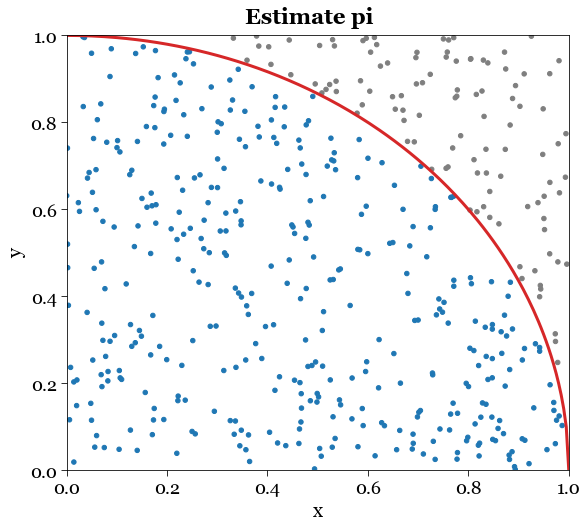

In [37]:
# plot quarter arc curve
fig = plt.figure(figsize=(9, 8))
ax = plt.gca()

func_x = np.linspace(0, 1, 200)  # 100 points between 0 and 2*pi
func_y = np.sqrt(1 - func_x ** 2)

# scatter plot
ax.scatter(xs, ys, \
            c=colors, s=20, \
            alpha=1)

ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# line plot
ax.plot(func_x, func_y, linewidth=3, color = tableau_colors[3])

plt.xlabel('x', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Estimate pi', fontproperties=suptitle_font, y=0.93)

# Show the plot
plt.savefig('../plots/visualize_MC.png')
plt.show()

## Estimate pi

In [38]:
def estimate_pi(N=100000):
    in_count = 0
    estimated_pis = np.zeros(N)
    for i in range(N):
        x = random.random()
        y = random.random()
        if is_in_circle(x, y):
            in_count += 1
        estimated_pis[i] = 4.0 * in_count / (i + 1)
    estimated_pi = 4.0 * in_count / N
    return estimated_pi, estimated_pis

In [39]:
estimated_pi, estimated_pis = estimate_pi()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/2383047524.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/2383047524.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


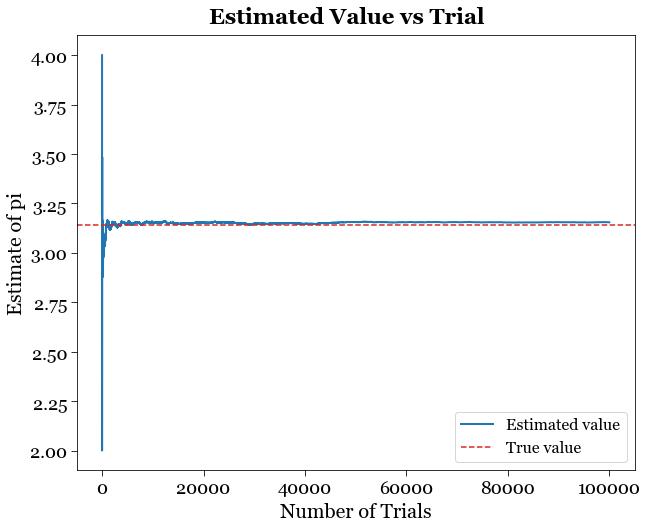

In [49]:
# plot all three cases together.
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

trials = list(range(1, len(estimated_pis) + 1))

ax.plot(trials, estimated_pis, \
            color=tableau_colors[0], linewidth=2.0, \
            alpha=1, label='Estimated value')

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
# ax.set_ylim(2, 4)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
ax.axhline(y=np.pi, color=tableau_colors[3], linestyle='--', label='True value')

# Customize the plot (optional)
plt.xlabel('Number of Trials', fontdict=font)
plt.ylabel('Estimate of pi', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Estimated Value vs Trial', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower right', prop=legend_font)

# Show the plot
plt.savefig('../plots/pi_estimate.png')
plt.show()

### If including points on line

In [51]:
def estimate_on_pi(N=100000):
    in_count = 0
    estimated_pis = np.zeros(N)
    for i in range(N):
        x = random.random()
        y = random.random()
        if is_in_on_circle(x, y):
            in_count += 1
        estimated_pis[i] = 4.0 * in_count / (i + 1)
    estimated_pi = 4.0 * in_count / N
    return estimated_pi, estimated_pis

In [52]:
estimated_pi, estimated_pis = estimate_on_pi()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/1692659174.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/1692659174.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


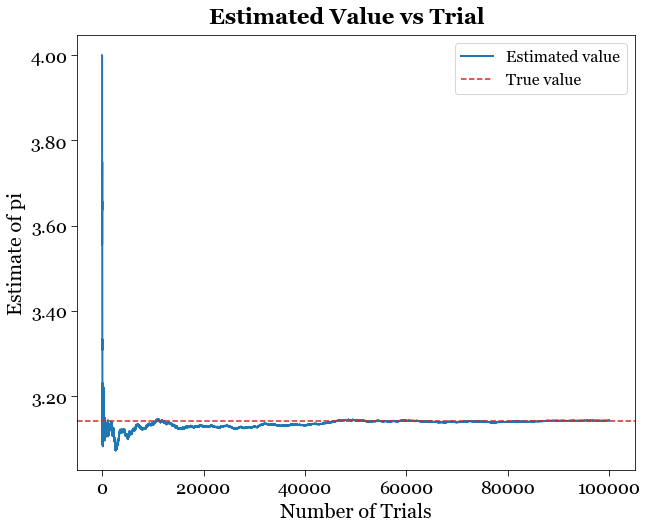

In [54]:
# plot all three cases together.
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

trials = list(range(1, len(estimated_pis) + 1))

ax.plot(trials, estimated_pis, \
            color=tableau_colors[0], linewidth=2.0, \
            alpha=1, label='Estimated value')

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
# ax.set_ylim(2, 4)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
ax.axhline(y=np.pi, color=tableau_colors[3], linestyle='--', label='True value')

# Customize the plot (optional)
plt.xlabel('Number of Trials', fontdict=font)
plt.ylabel('Estimate of pi', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Estimated Value vs Trial', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
plt.savefig('../plots/pi_on_estimate.png')
plt.show()

## Error analysis

In [55]:
def fast_estimate_pi(N):
    in_count = 0
    for i in range(N):
        x = random.random()
        y = random.random()
        if is_in_circle(x, y):
            in_count += 1
    estimated_pi = 4.0 * in_count / N
    return estimated_pi

In [68]:
def standard_error(Ns, M):
    std_devs = np.zeros(len(Ns))
    for n, N in enumerate(Ns):
        estimates = np.zeros(M)
        for m in range(M):
            estimates[m] = fast_estimate_pi(N)
        std_devs[n] = np.std(estimates)
    return std_devs

In [76]:
Ns = np.arange(2, 301) # sample size
M = 100 # batch size for averaging error

standard_errs = standard_error(Ns, M)

In [86]:
def fit_function(x, a, b):
    return a / np.sqrt(x) + b
# Use curve_fit to fit the function to the data
params, covariance = curve_fit(fit_function, Ns, standard_errs)
# Extract the fitted parameters
a_fit, b_fit = params
# Generate points for the fitted curve
fit_curve = fit_function(Ns, a_fit, b_fit)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/3126591218.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5432/3126591218.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


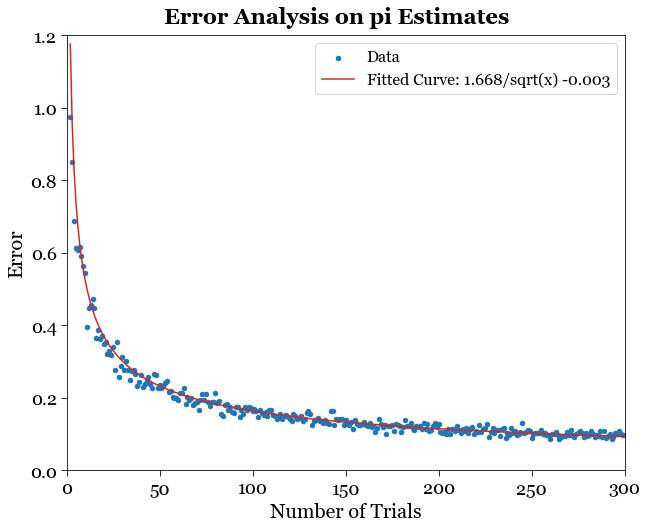

In [94]:
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

trials = list(range(1, len(standard_errs) + 1))

ax.scatter(trials, standard_errs, \
            color=tableau_colors[0], s=20, \
            alpha=1, label='Data')

ax.plot(Ns, fit_curve, color=tableau_colors[3], \
        label=f'Fitted Curve: {a_fit:.3f}/sqrt(x) {b_fit:.3f}')

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(0, 300)
ax.set_ylim(0, 1.2)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Customize the plot (optional)
plt.xlabel('Number of Trials', fontdict=font)
plt.ylabel('Error', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Error Analysis on pi Estimates', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
plt.savefig('../plots/pi_error_analysis.png')
plt.show()